## 배깅 bagging기반 분류기
<img src='img/bagging.png'>

* 연주하기 어려운 바이올린 연주곡을  
    두세명의 초급 바이올린 연주가가 나눠 연주함으로써  
   한명의 중급 연주자가 연주하는 것보다 더 나을 수 있음
  <br></br>
* bootstrap + aggregation
    + 한 가지 분류 모델을 여러 개 만들어서    
      **서로다른** 학습 데이터로 학습시킨 후(bootstrap)
    + **동일한 테스트 데이터** 에 대한 서로 다른 예측값들을   
      투표로 통해(aggregating) 가장높은 예측값으로    
      최종 결론은 내리는 기법
      <br></br>
* sklearn에서 BaggingClassifier를 제공

## bootstrap
* 배깅은 하나의 알고리즘을 사용하지만 학습 데이터셋을   
  랜덤하게 추출하여 모델(분류기)을 각각 다르게 학습시키는 방법
* 학습데이터를 추출할 때 **중복** 을 허용하는 것
* 데이터에 편향성이 생겨 모델이 과적합되는 것을 막을 수 있음

## 랜덤포레스트 
* 앙상블 알고리즘 중 베깅을 적용해서 만든 머신러닝 알고리즘
<img src = 'img/randomforest.png'>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
# 테스트용 데이터 생성
X, y = make_blobs(n_samples=350, centers=4, random_state=2111111715, cluster_std=1.0)

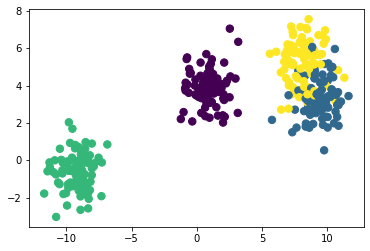

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [9]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2111111715)

In [37]:
# BaggingClassifier(분류기, 옵션)
# n_estimators : 배깅시 사용할 분류기 수 지정
# max_samples : 배깅시 사용할 표본의 갯수
# bootstrap : 표본 추출시 중복 허용 여부 지정
# n_jobs : 작업시 사용할 cpu 코어수 (-1은 최대)
bgcf = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=300, max_samples=175, bootstrap=True, n_jobs=-1)

In [14]:
bgcf.fit(Xtrain, ytrain)
pred = bgcf.predict(Xtest)
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


In [17]:
# 분류기 1개 수행시 결과
lr = LogisticRegression(max_iter=1000)

In [18]:
lr.fit(Xtrain, ytrain)
pred = lr.predict(Xtest)
print(lr.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


In [1]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


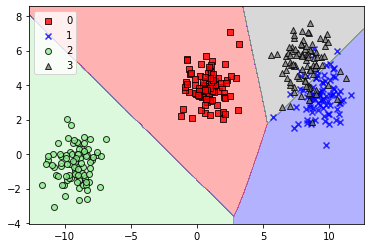

In [22]:
mldlpy3.plot_decision_regions(X,y,bgcf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


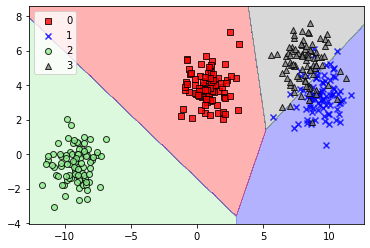

In [26]:
mldlpy3.plot_decision_regions(X,y,lr)

In [38]:
# KNeighbor 분류기 적용
bgcf1 = BaggingClassifier(KNeighborsClassifier(), n_estimators=300, max_samples=175, bootstrap=True, n_jobs=-1)

In [39]:
bgcf1.fit(Xtrain, ytrain)
pred = bgcf1.predict(Xtest)
print(bgcf1.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9469387755102041 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


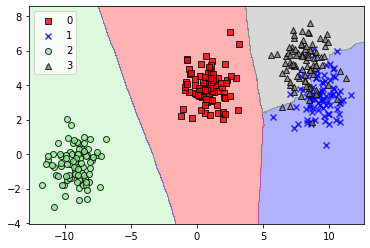

In [36]:
mldlpy3.plot_decision_regions(X,y,bgcf1)

In [40]:
# 분류기 1개 수행시
kcf = KNeighborsClassifier()

In [31]:
kcf.fit(Xtrain, ytrain)
pred = kcf.predict(Xtest)
print(kcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9469387755102041 0.9142857142857143


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


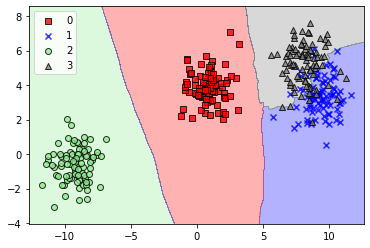

In [32]:
mldlpy3.plot_decision_regions(X,y,kcf)